# Gradient boosting

In [1]:
import numpy as np
import pandas as pd
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_predict
%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
# Reading data after dimensionality reduction with PCA
X_train = pd.read_csv(filepath_or_buffer='x_train_pca.csv', header=None)
y_train = pd.read_csv(filepath_or_buffer='y_train.csv')
X_test = pd.read_csv(filepath_or_buffer='x_test_pca.csv', header=None)
y_test = pd.read_csv(filepath_or_buffer='y_test.csv')

In [3]:
# Randomly assign parameters within typical range (got from reference listed in report)
params = {
    'booster': 'gbtree',
    'silent': 1,
    'eta': np.random.uniform(.05,.2),
    'min_child_weight': np.random.randint(3,7),
    'max_depth': np.random.randint(3,10),
    'subsample': np.random.uniform(.5,1),
    'colsample_bytree': np.random.uniform(.5,1),
    'early_stopping_rounds': 10
}

In [4]:
# Regression
xgb = XGBRegressor(**params)

In [5]:
# Training
xgb.fit(X_train.values, y_train.values)

[17:50:28] Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.7496721103654362, early_stopping_rounds=10,
       eta=0.13649816128934034, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=5, min_child_weight=6, missing=None,
       n_estimators=100, n_jobs=1, nthread=None, objective='reg:linear',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=1, subsample=0.6500237980872374)

In [6]:
# Predicting
y_pred = xgb.predict(X_test.values)

In [7]:
# RMSE evaluation
mse = np.sqrt(mean_squared_error(y_test.values, y_pred))
print("rmse: " + str(mse))

rmse: 0.4384574616694482


In [ ]:
# Using log to plot distribution of the training and predicted duration
plt.hist(np.log(y_train), bins=150, alpha=0.7, label='train', normed=True)
plt.hist(np.log(y_pred), bins=150, alpha=0.7, label='test pred', normed=True)
plt.xlabel('Duration of the ride in log(duration)')
plt.ylabel('Proportion of trips')
plt.legend(loc='upper left')
plt.show()

C:\Users\Asel\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


### Cross validation

In [11]:
predicted = cross_val_predict(xgb, X_test, y_test, cv=10)

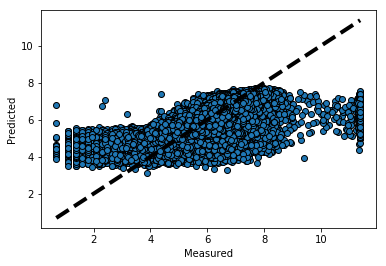

In [12]:
fig, ax = plt.subplots()
ax.scatter(y_test, predicted, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()